<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB 

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
# Cargar datos
data = pd.read_csv("/content/reviews_vidjew_es.csv")
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [21]:
train, test = train_test_split(data, test_size=0.3)

In [22]:
print(f"Tenemos {data.shape[0]} datos en total")
print(f"El conjunto de datos de entrenamiento (train) tiene: {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total
El conjunto de datos de entrenamiento (train) tiene: 700 datos.
El conjunto de datos de prueba (test) tiene 300 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [23]:
import nltk
nltk.download('stopwords')

stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto
  
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.product_category.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (700, 3010)
Tamaño de X_test (prueba): (300, 3010)
Tamaño de y_train 700 y tamaño de y_test 300


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [25]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [26]:
y_pred_nb = nb.predict(X_test)

metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"{metrica(y_test, y_pred_nb, pos_label='video_games'):.2f}")

precision_score
0.48
recall_score
1.00
f1_score
0.65


In [27]:
print(f"{accuracy_score(y_test, y_pred_nb):>15.2f}")

print(classification_report(y_test, y_pred_nb))
print()

           0.48
              precision    recall  f1-score   support

     jewelry       0.00      0.00      0.00       155
 video_games       0.48      1.00      0.65       145

    accuracy                           0.48       300
   macro avg       0.24      0.50      0.33       300
weighted avg       0.23      0.48      0.31       300




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



###  `[BONUS: 3 pts]` Matriz de confusión

Text(0.5, 1.0, 'Naive Bayes')

<Figure size 720x720 with 0 Axes>

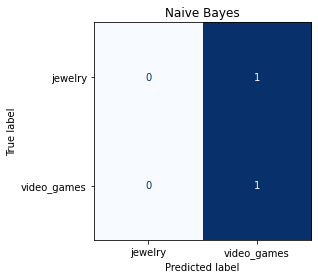

In [28]:
confusion_matrix(y_test, y_pred_nb)
fig = plt.figure(figsize=(10,10))

plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [29]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab

{1441: 'imagen',
 2728: 'tacto',
 84: 'agradable',
 990: 'encaja',
 288: 'bien',
 2948: 'viene',
 31: 'accesorios',
 2531: 'rugoso',
 2467: 'resbale',
 2306: 'pérdida',
 877: 'dinero',
 2812: 'total',
 562: 'compre',
 1234: 'finales',
 1716: 'marzo',
 1895: 'noche',
 1726: 'mañana',
 753: 'dejado',
 1278: 'funcionar',
 2142: 'plazo',
 2392: 'reclamar',
 2608: 'si',
 2177: 'pongo',
 1587: 'legal',
 775: 'dentro',
 259: 'año',
 1304: 'garantía',
 1103: 'espero',
 773: 'den',
 2667: 'solución',
 2763: 'tener',
 681: 'cuenta',
 1543: 'juego',
 152: 'ampliación',
 1489: 'inicial',
 2892: 'vale',
 1762: 'micro',
 263: 'baja',
 370: 'calidad',
 772: 'demás',
 862: 'dicen',
 1076: 'escucha',
 2533: 'ruidos',
 242: 'auriculares',
 2022: 'pasa',
 581: 'conectado',
 1886: 'ningún',
 2922: 'ventilador',
 2011: 'parecido',
 2777: 'tiempo',
 1625: 'llegar',
 217: 'artículo',
 1204: 'fatal',
 1920: 'nunca',
 1632: 'llego',
 2394: 'reclame',
 1857: 'nadir',
 616: 'contesto',
 2304: 'puta',
 1772: 'mie

In [30]:
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))][:10]

[('echos', -8.34),
 ('reloj', -8.34),
 ('relojero', -8.34),
 ('reluciente', -8.34),
 ('remarca', -8.34),
 ('enpaquetado', -8.34),
 ('enormes', -8.34),
 ('relacion', -8.34),
 ('engarzada', -8.34),
 ('enganche', -8.34)]

In [31]:
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))][-10:]

[('regalo', -6.55),
 ('jugar', -6.54),
 ('si', -6.35),
 ('precio', -6.33),
 ('buen', -6.33),
 ('mando', -6.24),
 ('producto', -6.17),
 ('perfecto', -6.07),
 ('bien', -5.81),
 ('juego', -5.61)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

In [ ]:
El modelo clasifica todo cómo video juegos lo que lo hace poco eficaz.